In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1.get_object(Bucket='1',Key='fhrw-4uyv.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()

Bucket='1'

In [2]:
df_data_0.to_pickle('./df_raw.pkl')

client_1.upload_file('./df_raw.pkl',Bucket,'df_raw_cos.pkl')

client_1.download_file(Bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')

df_NY = pd.read_pickle('./df_raw_local.pkl')

In [3]:

body = client_1.get_object(Bucket='1',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_1 = pd.read_csv(body,parse_dates=True)
df_data_1.head()

Bucket='1'

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_data_1.to_pickle('./df_raw.pkl')

client_1.upload_file('./df_raw.pkl',Bucket,'df_raw_cos.pkl')

client_1.download_file(Bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')

df_data_2 = pd.read_pickle('./df_raw_local.pkl')

In [5]:
df_NY.head(3)

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-15T21:20:00.000,45397440,HEAT/HOT WATER,10456.0,1250 FRANKLIN AVENUE,FRANKLIN AVENUE,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.830871,-73.902850,NaN,RESIDENTIAL BUILDING,Open
1,2020-01-15T10:54:04.000,45396490,GENERAL,10039.0,208 WEST 151 STREET,WEST 151 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.825551,-73.936620,NaN,RESIDENTIAL BUILDING,Open
2,2020-01-15T19:45:27.000,45397525,HEAT/HOT WATER,10039.0,247 WEST 145 STREET,WEST 145 STREET,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.822237,-73.940471,NaN,RESIDENTIAL BUILDING,Open


In [6]:
df_data_2=df_data_2[['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 
                    'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 
                    'ZipCode', 'YCoord', 'XCoord']]
df_data_2=df_data_2.set_index(df_data_2['Address'])
df_data_2.dropna(inplace=True)
df_data_2.drop('Address', axis=1,inplace=True)
df_data_2.head(3)

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
Address,,,,,,,,,,,,,,,,,,,
122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0


In [7]:
df_NY_HEAT=df_NY.loc[df_NY['complaint_type'] == 'HEAT/HOT WATER']
df_BX_HEAT=df_NY_HEAT.loc[df_NY['borough'] == 'BRONX'][['incident_address','incident_zip']]
df_BX_HEAT.head(3)

,incident_address,incident_zip
0,1250 FRANKLIN AVENUE,10456.0
4,3345 DECATUR AVENUE,10467.0
8,2301 TURNBULL AVENUE,10473.0


In [8]:
df_BX_HEAT_count=df_BX_HEAT['incident_address'].value_counts()
df_BX_HEAT_count=df_BX_HEAT_count.rename_axis('incident_address').reset_index(name='counts')
df_BX_HEAT_count.head()
df_BX_HEAT_count=df_BX_HEAT_count.set_index(df_BX_HEAT_count['incident_address'])
df_BX_HEAT_count.drop('incident_address', axis=1,inplace=True)
df_BX_HEAT_count.head(3)

,counts
incident_address,
1025 BOYNTON AVENUE,5220
2090 EAST TREMONT AVENUE,3605
2968 PERRY AVENUE,2429


In [9]:
df_BX_HEAT_data=df_data_2.join(df_BX_HEAT_count, on='Address', how='left', lsuffix='', rsuffix='', sort=False)
df_BX_HEAT_data.head(3)

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,counts
Address,,,,,,,,,,,,,,,,,,,,
122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,NaN
126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,NaN
138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,NaN


In [10]:
import numpy as np
a = np.isnan(df_BX_HEAT_data['counts'])
df_BX_HEAT_data['counts'][a] = 0
df_BX_HEAT_data.head(3)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,counts
Address,,,,,,,,,,,,,,,,,,,,
122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,0.0
126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,0.0
138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,0.0


In [11]:
df_BX_HEAT_data=df_BX_HEAT_data.loc[df_BX_HEAT_data['YearBuilt']!=0]
df_BX_HEAT_data.corr()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,counts
BldgArea,1.000000,0.261062,0.280544,0.048088,0.097821,0.074076,0.172276,0.324862,0.542114,0.376706,0.230481,0.891823,0.089229,0.165449,0.023423,0.095613,0.092978,-0.020454,-0.075829,0.069191
BldgDepth,0.261062,1.000000,0.245394,0.259145,0.327974,-0.003424,0.034335,0.373555,0.030057,0.299654,0.203394,0.142940,0.263495,0.213914,-0.027811,0.259665,-0.151510,-0.115597,-0.284038,0.136767
BuiltFAR,0.280544,0.245394,1.000000,0.046413,0.275207,0.112851,-0.004077,-0.003257,0.070312,0.432510,0.041438,0.272634,0.281835,0.345852,-0.006012,0.139661,-0.156544,-0.067865,-0.224260,0.142634
CommFAR,0.048088,0.259145,0.046413,1.000000,0.222235,0.007256,0.009829,0.092808,0.002146,-0.021349,0.057194,-0.006909,0.067818,0.147565,-0.013023,0.138694,-0.105221,-0.135412,-0.182131,-0.004482
FacilFAR,0.097821,0.327974,0.275207,0.222235,1.000000,-0.027003,-0.008888,0.002241,-0.031496,0.336692,0.043840,0.084116,0.856998,0.082602,-0.050419,0.185344,-0.443935,-0.234945,-0.670170,0.115815
Lot,0.074076,-0.003424,0.112851,0.007256,-0.027003,1.000000,0.007099,0.043066,0.112823,0.100092,0.021042,0.067843,-0.013600,0.083068,0.085482,-0.005812,0.035493,0.092346,-0.102265,-0.000431
LotArea,0.172276,0.034335,-0.004077,0.009829,-0.008888,0.007099,1.000000,0.395172,0.339029,0.030779,0.079107,0.075314,-0.009450,0.016688,0.002804,0.026832,0.096763,0.001532,0.001343,0.002012
LotDepth,0.324862,0.373555,-0.003257,0.092808,0.002241,0.043066,0.395172,1.000000,0.273324,0.158618,0.231118,0.187767,-0.015518,0.131555,0.028757,0.099213,0.027518,-0.017132,-0.037340,0.024229
NumBldgs,0.542114,0.030057,0.070312,0.002146,-0.031496,0.112823,0.339029,0.273324,1.000000,0.049548,0.068518,0.456720,-0.037949,0.046691,-0.036334,0.020490,0.192542,-0.007885,0.045193,-0.007988
NumFloors,0.376706,0.299654,0.432510,-0.021349,0.336692,0.100092,0.030779,0.158618,0.049548,1.000000,0.072140,0.381314,0.375179,0.022110,0.058767,0.175250,-0.195829,-0.042663,-0.302209,0.222561


In [12]:
df_BX_HEAT_data[df_BX_HEAT_data['counts']!=0]=1
df_BX_HEAT_data.rename(columns={'counts':'occur'},inplace=True)
df_BX_HEAT_data.corr()

,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,occur
BldgArea,1.000000,0.214067,0.231392,0.024435,0.066672,0.053851,0.169684,0.257377,0.562270,0.318485,0.211599,0.879290,0.047674,0.172408,0.037314,0.085167,0.036686,0.034420,0.035500,-0.036464
BldgDepth,0.214067,1.000000,0.124143,-0.113518,0.433023,0.054130,0.033330,0.593045,0.062926,0.346562,0.207278,0.090255,0.237689,0.197191,0.579264,0.258042,0.578937,0.567258,0.575104,-0.579082
BuiltFAR,0.231392,0.124143,1.000000,0.051688,0.170166,0.104305,-0.006148,-0.018025,0.059888,0.275279,0.064100,0.197788,0.178869,0.476669,-0.008510,0.076654,-0.010225,-0.015721,-0.013162,0.010064
CommFAR,0.024435,-0.113518,0.051688,1.000000,-0.045063,-0.063310,0.002019,-0.274208,-0.028375,-0.278287,0.045105,-0.019045,-0.039755,0.104647,-0.564342,0.068319,-0.564608,-0.573430,-0.567765,0.564468
FacilFAR,0.066672,0.433023,0.170166,-0.045063,1.000000,-0.004154,-0.005711,0.241288,-0.001554,0.346042,0.056330,0.039778,0.827479,0.089625,0.410278,0.168503,0.410017,0.389105,0.398626,-0.410602
Lot,0.053851,0.054130,0.104305,-0.063310,-0.004154,1.000000,0.005556,0.099597,0.122106,0.129282,0.026994,0.044336,-0.014636,0.081856,0.112238,0.016409,0.110163,0.121403,0.107530,-0.110080
LotArea,0.169684,0.033330,-0.006148,0.002019,-0.005711,0.005556,1.000000,0.331423,0.340818,0.034922,0.056145,0.067905,-0.010002,0.012642,0.011346,0.031181,0.011468,0.011377,0.011329,-0.011304
LotDepth,0.257377,0.593045,-0.018025,-0.274208,0.241288,0.099597,0.331423,1.000000,0.251871,0.361551,0.206126,0.130930,0.081890,0.107486,0.604700,0.156742,0.604494,0.599968,0.603740,-0.604456
NumBldgs,0.562270,0.062926,0.059888,-0.028375,-0.001554,0.122106,0.340818,0.251871,1.000000,0.094607,0.039120,0.473511,-0.022552,0.049836,0.053221,0.033516,0.055189,0.053430,0.055668,-0.054865
NumFloors,0.318485,0.346562,0.275279,-0.278287,0.346042,0.129282,0.034922,0.361551,0.094607,1.000000,0.106467,0.304418,0.288839,0.016762,0.433615,0.120370,0.429796,0.426361,0.426104,-0.429965


In [13]:
df_BX_HEAT_data[['BldgDepth','CommFAR','LotDepth','NumFloors','YearBuilt','occur']].corr()

,BldgDepth,CommFAR,LotDepth,NumFloors,YearBuilt,occur
BldgDepth,1.000000,-0.113518,0.593045,0.346562,0.579264,-0.579082
CommFAR,-0.113518,1.000000,-0.274208,-0.278287,-0.564342,0.564468
LotDepth,0.593045,-0.274208,1.000000,0.361551,0.604700,-0.604456
NumFloors,0.346562,-0.278287,0.361551,1.000000,0.433615,-0.429965
YearBuilt,0.579264,-0.564342,0.604700,0.433615,1.000000,-0.999306
occur,-0.579082,0.564468,-0.604456,-0.429965,-0.999306,1.000000


In [14]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 10))
plt.show()

<Figure size 1000x1000 with 0 Axes>

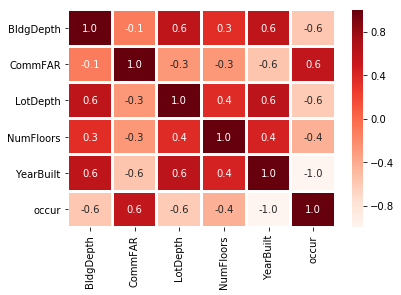

In [15]:
import seaborn as sns    
sns.heatmap(data = df_BX_HEAT_data[['BldgDepth','CommFAR','LotDepth','NumFloors','YearBuilt','occur']].corr(), annot=True, 
fmt = '.1f', linewidths=2, cmap='Reds')